In [17]:
import pydub
import numpy as np
import os

out_dir = './audio_npy'
if not os.path.exists(out_dir): os.makedirs(out_dir)


def inverse_mu(arr, mu_vaue=256):
    arr = arr.astype(np.float64)
    arr = (arr - 128) / 128

    sign = np.sign(arr)
    
    base = np.zeros_like(arr)
    base.fill(255)
    recip = np.reciprocal(base)
    power = np.power(base+1, arr) - 1
    out = np.multiply(sign, recip)
    out = np.multiply(out, power)
    return out

def preprocess_audio(f, encoding='mp4'):
    segment = pydub.AudioSegment.from_file(f, encoding)
    data = np.array(segment.get_array_of_samples(), dtype=np.float32) / 2 ** 16
    # stereo data, convert to mono by averaging the channels
    if (segment.channels == 2):
        data = data.reshape((-1, 2))
        data = (data[:,0] + data[:,1]) / 2
    
    mu_transform = np.multiply(np.sign(data), np.log(1 + 255 * np.abs(data)) / np.log(256))
    mu_transform[mu_transform >= 0] = mu_transform[mu_transform >=0 ] * 127
    mu_transform[mu_transform < 0] = mu_transform[mu_transform < 0] * 128 
    return mu_transform.astype('int32') + 128, data

In [28]:
values = (values - 128).astype('float32')
values[values >= 0] = values[values >=0] /  127
values[values < 0] = values[values < 0] / 128

sign = np.sign(values)
base = np.zeros_like(sign)
base.fill(255)
divide = np.reciprocal(base)
power = np.power(base+1, np.abs(values)) - 1
out = np.multiply(divide, power)
out = np.multiply(out, sign)


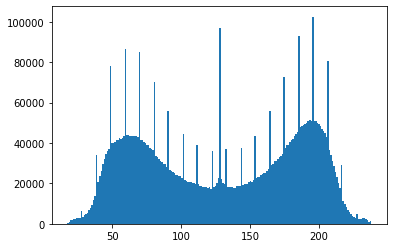

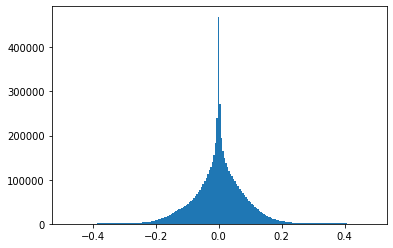

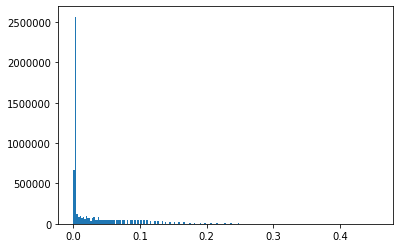

In [27]:
import matplotlib.pyplot as plt

# show that our mu transform is is working as we intended it to 
data, original = preprocess_audio('lofibeats/track_0.mp4')
values = data.reshape(-1)
inverted = inverse_mu(values)

plt.hist(values, bins=200)
plt.show()
plt.hist(original.reshape(-1), bins=200)
plt.show()
plt.hist(inverted, bins=200)
plt.show()

In [115]:
from sklearn.preprocessing import OneHotEncoder
def one_hot(encoder, data):
    data = np.squeeze(data)
    data = data[:, None]
    return encoder.fit_transform(data)

In [116]:
categories = np.arange(0, 256)
encoder = OneHotEncoder(categories=[categories], handle_unknown='ignore')
test = one_hot(encoder, data)

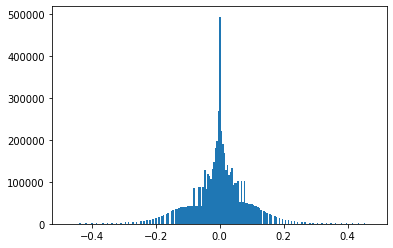

In [29]:
plt.hist(out, bins=200)
plt.show()

In [119]:
import scipy.sparse

test = scipy.sparse.load_npz('./sparse_matrices/song_0.sparse.npz')

In [122]:
test = test.toarray()